<a href="https://colab.research.google.com/github/MohammadAli147369/Machine-learning-projects/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve,
    roc_auc_score,
    roc_curve)

In [ ]:
df = pd.read_csv('/content/framingham_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df['cigsPerDay'].isnull().sum()

29

In [ ]:
df.duplicated().sum()

0

In [ ]:
max_bmi = df['BMI'].max()
max_bmi

56.8

In [ ]:
min_bmi = df['BMI'].min()
min_bmi

15.54

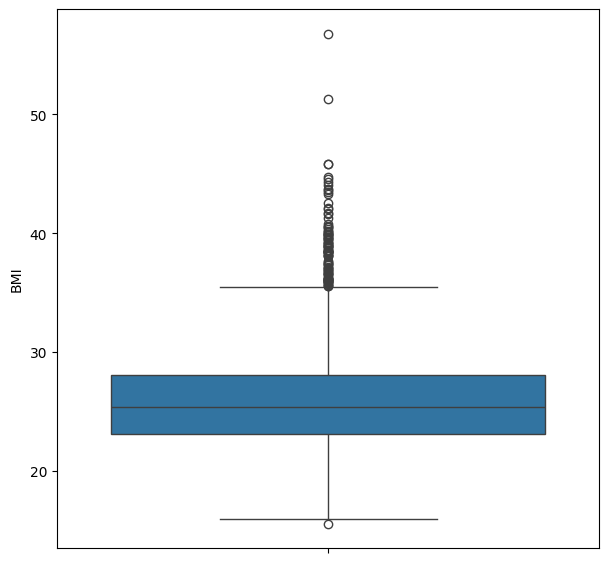

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df['BMI'], showfliers=True)
plt.show()

In [ ]:
h = df[df['BMI']  > 40]
h

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
78,0,45,1.0,0,0.0,0.0,0,1,0,183.0,151.0,101.0,45.80,80.0,63.0,0
108,0,66,1.0,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1
114,0,41,1.0,0,0.0,0.0,0,1,0,265.0,136.0,98.0,42.15,90.0,NaN,0
165,0,62,1.0,0,0.0,0.0,0,1,0,266.0,173.0,89.0,42.00,62.0,75.0,0
249,0,60,1.0,1,20.0,0.0,0,0,1,180.0,200.0,122.5,44.27,88.0,150.0,0
433,0,45,2.0,0,0.0,0.0,0,1,0,226.0,180.0,99.0,45.79,110.0,NaN,0
750,0,67,1.0,0,0.0,1.0,0,1,0,251.0,192.0,102.0,44.09,55.0,62.0,0
829,0,53,4.0,0,0.0,0.0,0,0,0,240.0,133.5,82.5,40.58,70.0,NaN,0
833,0,53,1.0,0,0.0,0.0,0,1,1,248.0,200.0,140.0,43.30,107.0,130.0,1


In [ ]:
top_3 = df['BMI'].sort_values(ascending=False).nlargest(3)

In [ ]:
top_3

2657    56.80
3927    51.28
78      45.80
Name: BMI, dtype: float64

In [ ]:
top_4 = df['BMI'].sort_values(ascending=False).nlargest(4)
top_4

2657    56.80
3927    51.28
78      45.80
433     45.79
Name: BMI, dtype: float64

In [ ]:
top =  df['BMI'].sort_values(ascending=False)

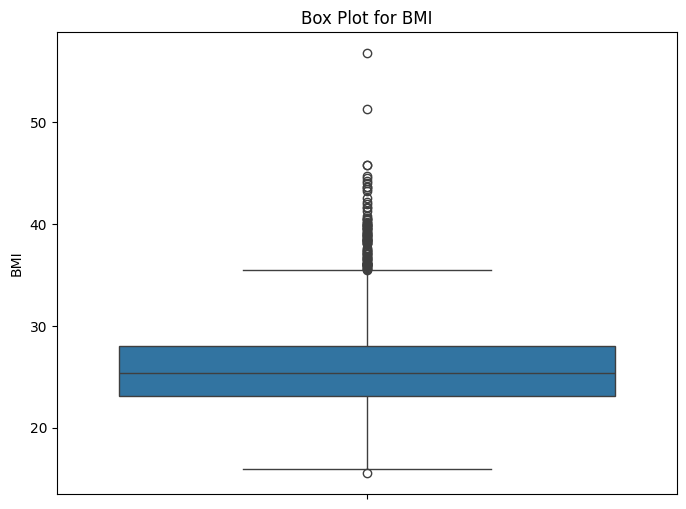

In [ ]:


# Create a box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['BMI'], showfliers=True)
plt.title('Box Plot for BMI')
plt.show()

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
education_mean = df['education'].mean()
education_mean

1.9789499153157513

In [ ]:
df['education'].fillna(education_mean, inplace = True)


In [ ]:

print(df['education'].isnull().sum())

0


In [ ]:
median = df['cigsPerDay'].median()  # Calculate mean before filling

# Fill missing values in 'education' column with the calculated mean
df['cigsPerDay'].fillna(median, inplace=True)

# Check for missing values in 'education' (should be 0 now)
print(df['cigsPerDay'].isnull().sum())

0


In [ ]:
median = df['BPMeds'].median()  # Calculate mean before filling

# Fill missing values in 'education' column with the calculated mean
df['BPMeds'].fillna(median, inplace=True)

# Check for missing values in 'education' (should be 0 now)
print(df['BPMeds'].isnull().sum())

0


In [ ]:
#totChol
median = df['totChol'].median()  # Calculate mean before filling

# Fill missing values in 'education' column with the calculated mean
df['totChol'].fillna(median, inplace=True)

# Check for missing values in 'education' (should be 0 now)
print(df['totChol'].isnull().sum())

0


In [ ]:
# BMI
median = df['BMI'].median()  # Calculate mean before filling

# Fill missing values in 'education' column with the calculated mean
df['BMI'].fillna(median, inplace=True)

# Check for missing values in 'education' (should be 0 now)
print(df['BMI'].isnull().sum())

0


In [ ]:
# glucose

median = df['glucose'].median()  # Calculate median before filling

# Fill missing values in 'BMI' column with the calculated mean
df['glucose'].fillna(median, inplace=True)

# Check for missing values in 'BMI' (should be 0 now)
print(df['glucose'].isnull().sum())

0


In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# heartRate

median = df['heartRate'].median()  # Calculate median before filling

# Fill missing values in 'BMI' column with the calculated mean
df['heartRate'].fillna(median, inplace=True)

# Check for missing values in 'BMI' (should be 0 now)
print(df['heartRate'].isnull().sum())

0


In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


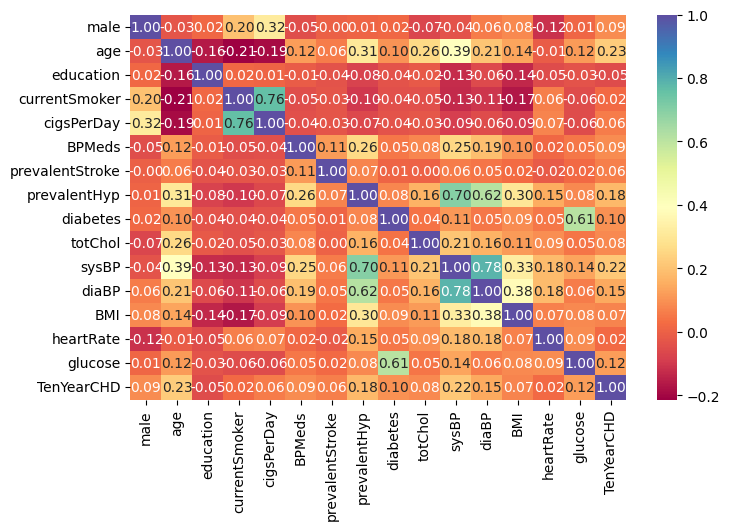

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
# Scaling
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('TenYearCHD')
scalar = StandardScaler()
numerical_columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [ ]:
df[numerical_columns] = scalar.fit_transform(df[numerical_columns])
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153192,-1.234951,2.007088,-0.988271,-0.751322,-0.173612,-0.077033,-0.671101,-0.162477,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359,0
1,-0.867158,-0.418257,0.020905,-0.988271,-0.751322,-0.173612,-0.077033,-0.671101,-0.162477,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099,0
2,1.153192,-0.184916,-0.972187,1.011868,0.929210,-0.173612,-0.077033,-0.671101,-0.162477,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537,0
3,-0.867158,1.331800,1.013996,1.011868,1.769476,-0.173612,-0.077033,1.490089,-0.162477,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872,1
4,-0.867158,-0.418257,1.013996,1.011868,1.181289,-0.173612,-0.077033,-0.671101,-0.162477,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.153192,0.048425,-0.972187,1.011868,-0.667296,-0.173612,-0.077033,1.490089,-0.162477,1.721723,2.116930,0.764648,0.041713,-0.821599,0.192298,1
4234,1.153192,0.165095,1.013996,1.011868,2.861821,-0.173612,-0.077033,-0.671101,-0.162477,-0.669856,-0.265590,-0.242955,-1.496159,-0.904768,-0.595016,0
4235,-0.867158,-0.184916,0.020905,1.011868,0.929210,-0.173612,-0.077033,-0.671101,-0.162477,0.255189,-0.061374,-0.914691,-0.933583,0.675436,0.192298,0
4236,-0.867158,-0.651598,-0.972187,1.011868,0.509077,-0.173612,-0.077033,-0.671101,-0.162477,-0.602170,-0.265590,0.344813,-1.631275,0.841773,-0.157620,0


In [ ]:
df.dtypes

male               float64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
X = df.drop("TenYearCHD", axis=1)
Y = df["TenYearCHD"]
# Remove heartRate, education
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (3390, 15)
Shape of test set : (848, 15)
Percentage of classes in training set:
0    0.846608
1    0.153392
Name: TenYearCHD, dtype: float64
Percentage of classes in test set:
0    0.853774
1    0.146226
Name: TenYearCHD, dtype: float64


In [ ]:
#Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_score = accuracy_score(y_train ,model.predict(X_train))
train_score

0.8548672566371681

In [ ]:
y_pred = accuracy_score(y_test, model.predict(X_test))
y_pred

0.8573113207547169

In [ ]:
score = recall_score(y_train, model.predict(X_train))
score

0.09615384615384616

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()

# Calculate recall (sensitivity)
recall = tp / (tp + fn)
recall

0.07258064516129033

In [ ]:
# import plotly.graph_objs as go

# # Assuming 'data' is a list or array containing the data to be plotted
# trace = go.Box(y=data)

# # Create layout
# layout = go.Layout(title='Boxplot Example')

# # Create figure
# fig = go.Figure(data=[trace], layout=layout)

# # Show the plot
# fig.show()

In [ ]:
# from sklearn.metrics import roc_curve, auc
# y_pred =
# # Assuming 'y_true' contains the true labels and 'y_scores' contains the predicted scores
# fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# # Compute the area under the ROC curve (AUC)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

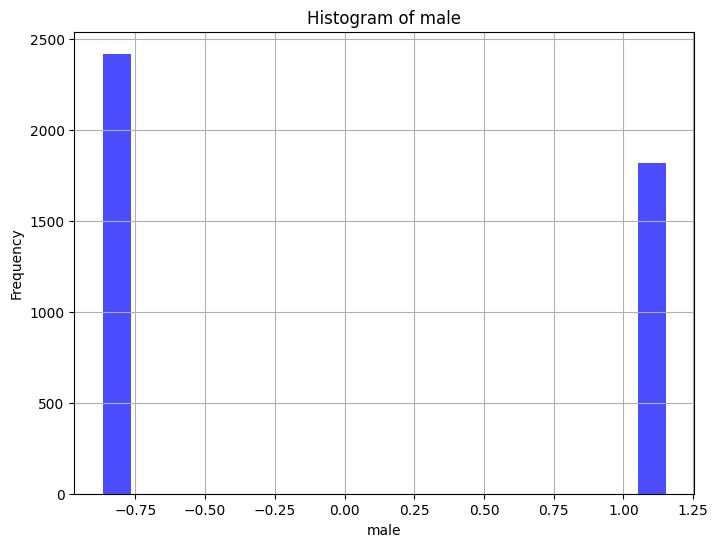

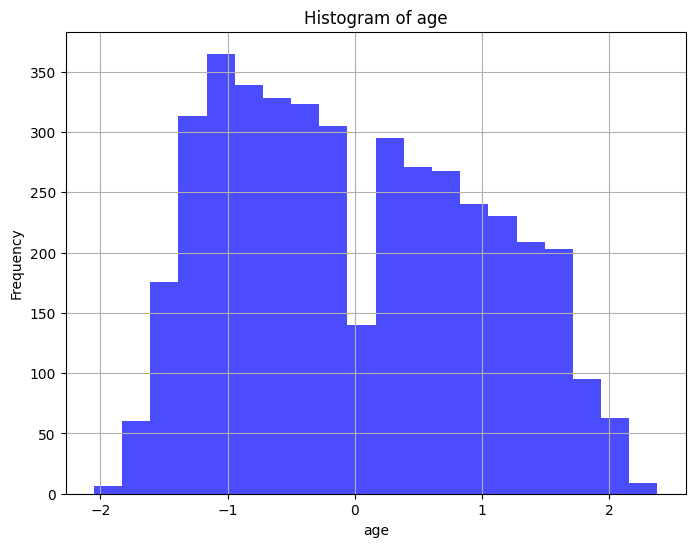

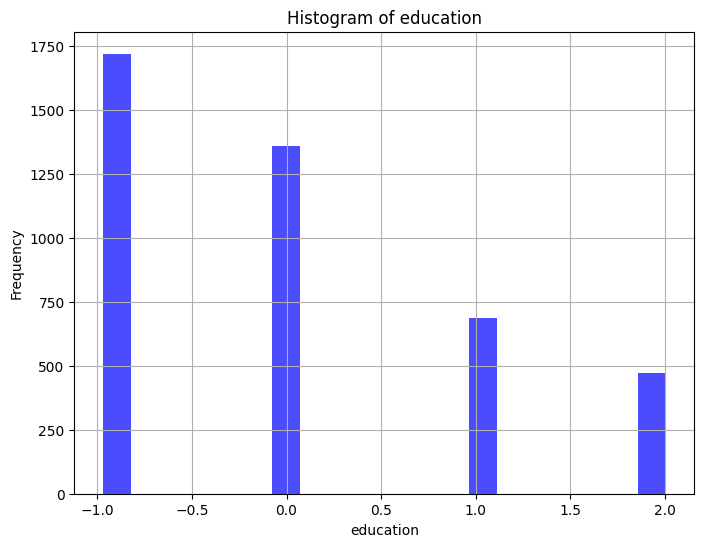

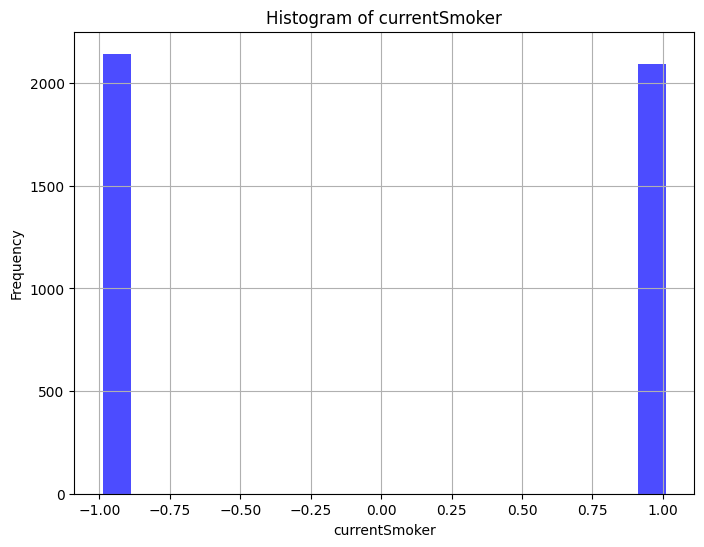

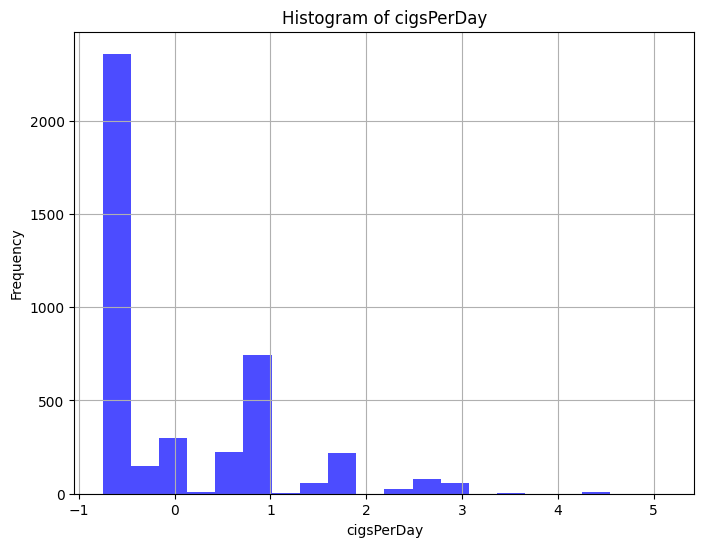

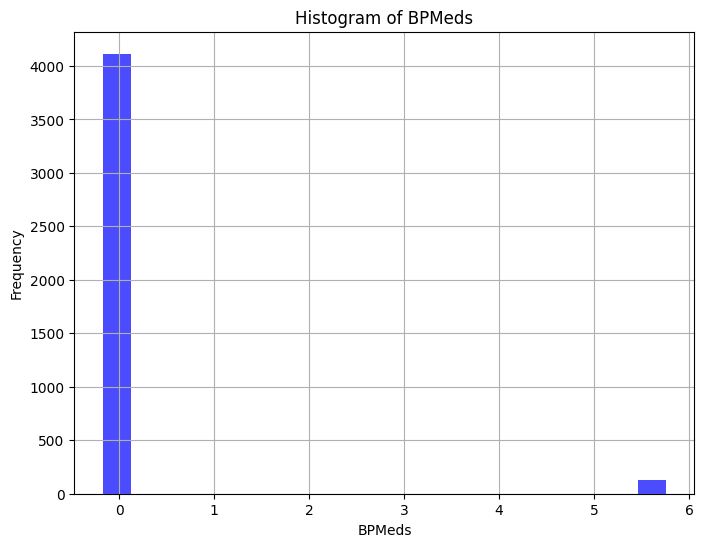

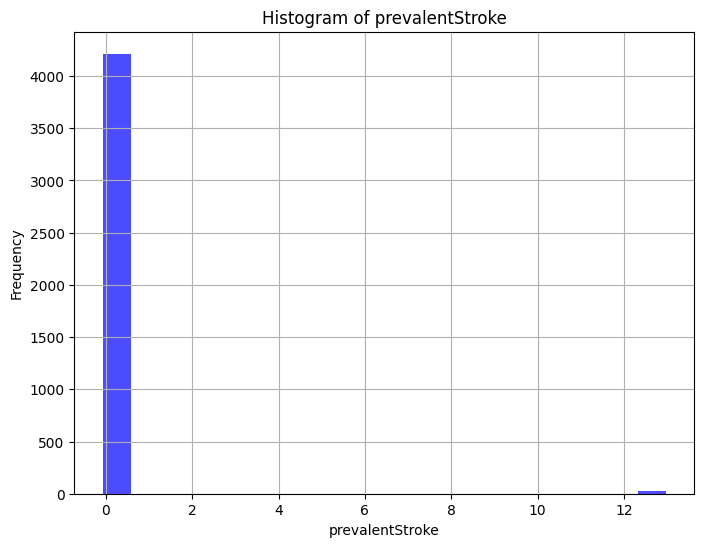

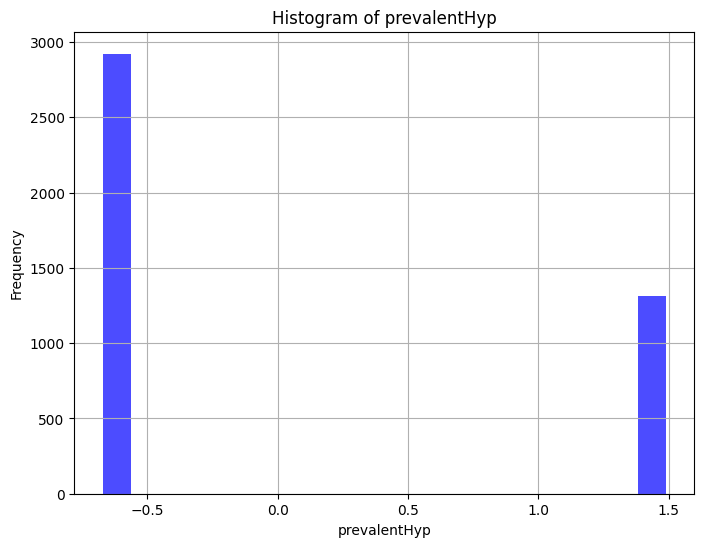

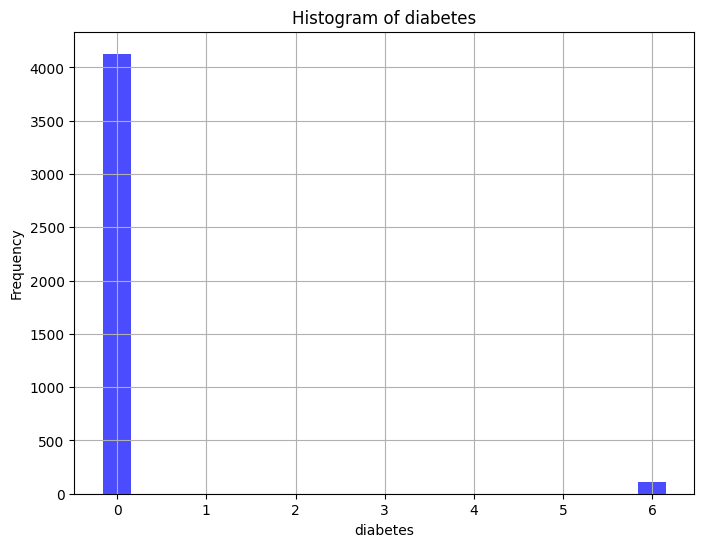

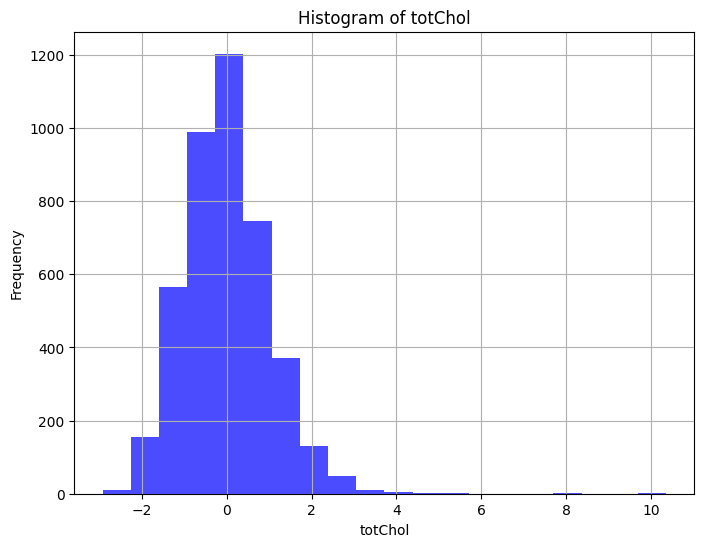

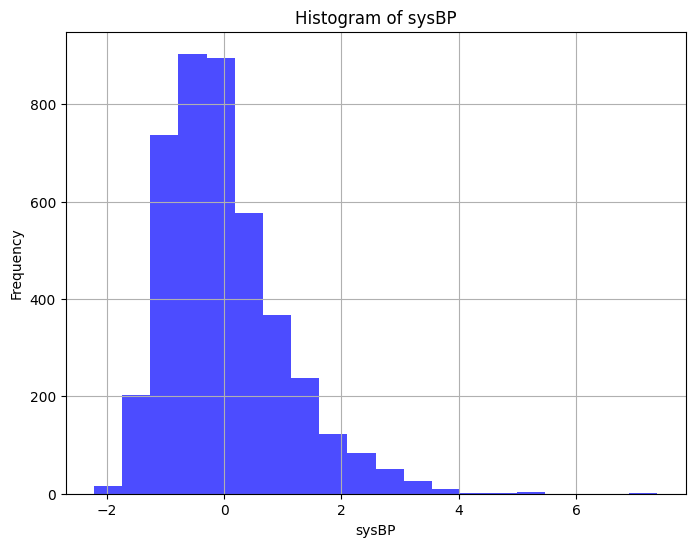

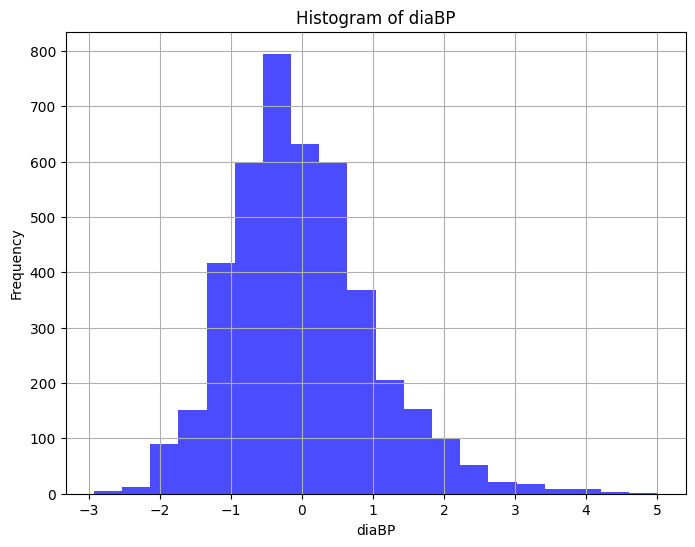

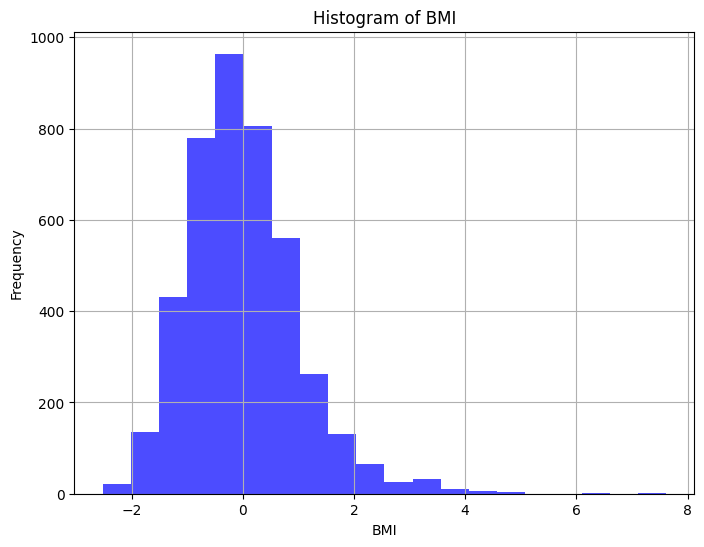

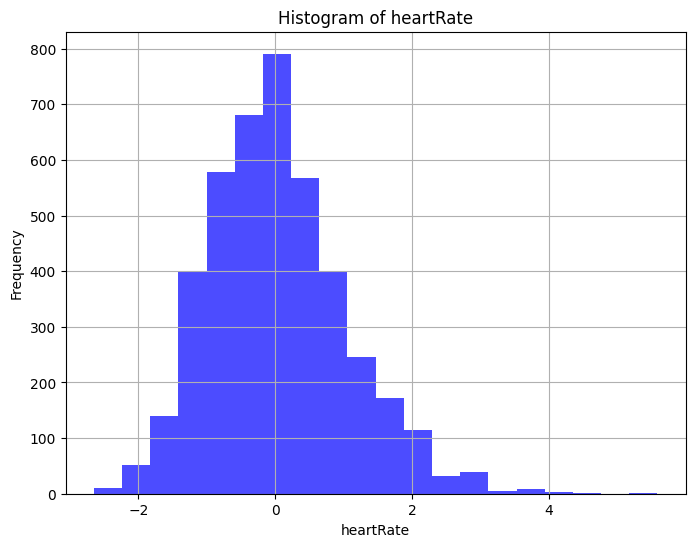

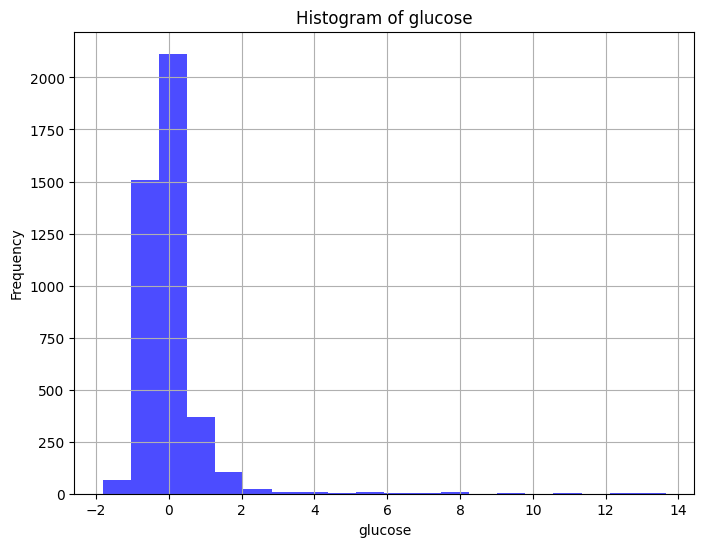

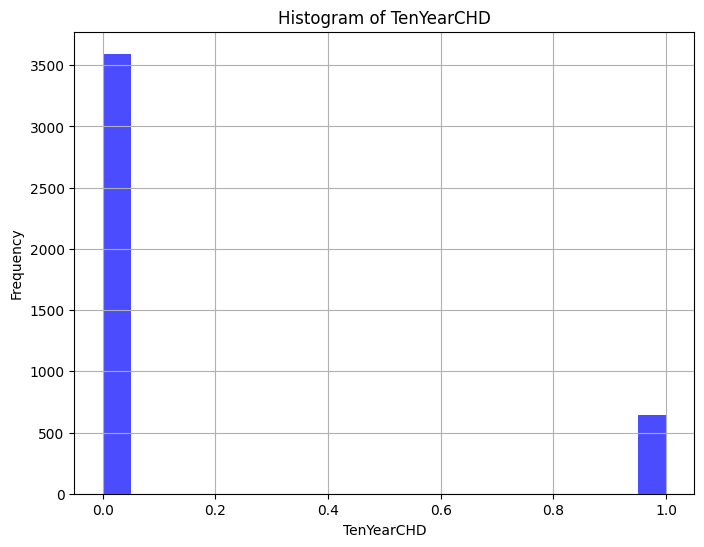

In [ ]:

def plot_histograms(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='blue', alpha=0.7)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.grid(True)
        plt.show()

# Assuming 'df' is your DataFrame
plot_histograms(df)

In [ ]:
sns.histplot(data=df['BMI'], bins=40, facecolor='teal')
